In [1]:
import numpy as np
import os

import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == 5)

In [7]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 

# Extra Material

## Dummy Classifier

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict

dmy_clf = DummyClassifier()
y_probas_dummy = cross_val_predict(dmy_clf, X_train, y_train, cv=3, method="predict_proba")
y_scores_dummy = y_probas_dummy[:,1]

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


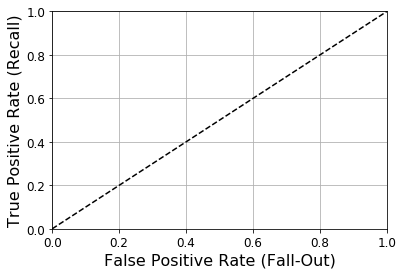

In [9]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores_dummy)
plot_roc_curve(fpr, tpr)

## KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [11]:
y_knn_pred = knn_clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_knn_pred)

0.9714

In [13]:
some_digit = X[0]

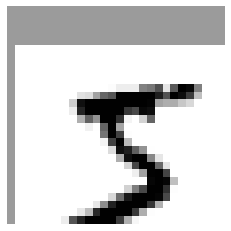

In [14]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dx, dy], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [15]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    print(dx, dy)

1 0
-1 0
0 1
0 -1


In [16]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [17]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [18]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [20]:
ambigous_digit = X_test[2589]
knn_clf.predict_proba([ambigous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

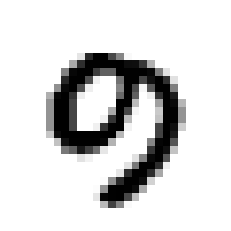

In [21]:
plot_digit(ambigous_digit)

# Exercise Solutions

## 1. A MNIST classifier with over 97% accuracy

**MAY TAKE HOURS** ▼

In [22]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbours': [3, 4, 5]}]

# knn_clf = KNeighboursClassifier()
# grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
# grid_search.fit(X_train, y_train)

Look for best_params_, best_score_, and accuracy_score

In [24]:
import dill

In [25]:
dill.dump_session('Chp#3-Exercises.db')

TypeError: can't pickle dict_keys objects